In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pydot
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Data preprocessing 

In [77]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [78]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## Add Noise

In [79]:
noise_factor=10

In [80]:
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0,scale=1.0,size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

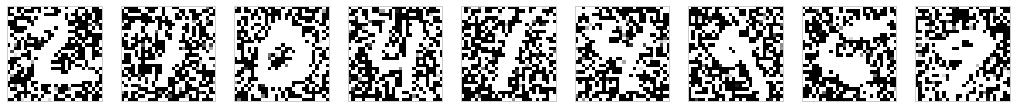

In [94]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [81]:
x_train = x_train_noisy
x_test = x_test_noisy

In [82]:
x_train = tf.expand_dims(x_train, axis=-1, name=None)
x_test = tf.expand_dims(x_test, axis=-1, name=None)

In [83]:
x_train.shape, x_test.shape

(TensorShape([60000, 28, 28, 1]), TensorShape([10000, 28, 28, 1]))

In [84]:
y_train = keras.utils.to_categorical(y_train, 10, dtype='uint8')
y_test = keras.utils.to_categorical(y_test, 10, dtype='uint8')

# Model Designing

In [85]:
input_shape = (28, 28, 1)
classes = 10
epochs = 10
batch_size = 128

## 2-Conv

In [86]:
model = keras.Sequential()

In [87]:
model.add(keras.Input(shape=input_shape))

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.9))
model.add(layers.Dense(classes, activation="softmax"))

In [88]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 3200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [89]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [90]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, 
                    use_multiprocessing=True)

Epoch 1/10
422/422 [==============================] - 29s 69ms/step - loss: 1.1450 - accuracy: 0.6104 - val_loss: 0.3200 - val_accuracy: 0.9170
Epoch 2/10
422/422 [==============================] - 30s 71ms/step - loss: 0.6102 - accuracy: 0.8051 - val_loss: 0.2387 - val_accuracy: 0.9382
Epoch 3/10
422/422 [==============================] - 31s 74ms/step - loss: 0.5361 - accuracy: 0.8279 - val_loss: 0.2049 - val_accuracy: 0.9410
Epoch 4/10
422/422 [==============================] - 33s 77ms/step - loss: 0.5036 - accuracy: 0.8386 - val_loss: 0.1912 - val_accuracy: 0.9472
Epoch 5/10
422/422 [==============================] - 32s 75ms/step - loss: 0.4875 - accuracy: 0.8449 - val_loss: 0.1855 - val_accuracy: 0.9477
Epoch 6/10
422/422 [==============================] - 32s 76ms/step - loss: 0.4658 - accuracy: 0.8502 - val_loss: 0.1837 - val_accuracy: 0.9505
Epoch 7/10
422/422 [==============================] - 32s 75ms/step - loss: 0.4510 - accuracy: 0.8551 - val_loss: 0.1689 - val_accuracy:

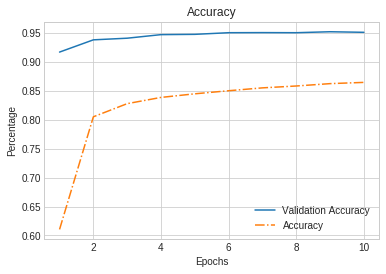

In [91]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.title('Accuracy')

x = np.arange(1,epochs+1)
val_accuracy = history.history.get('val_accuracy')
accuracy = history.history.get('accuracy')

plt.plot(x, val_accuracy, label='Validation Accuracy')
plt.plot(x, accuracy, linestyle='dashdot', label='Accuracy')

plt.legend()
plt.show()

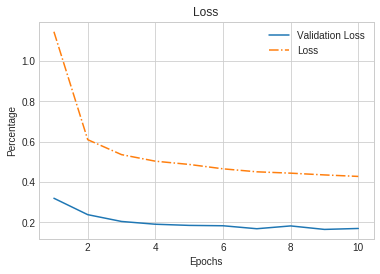

In [92]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.title('Loss')

x = np.arange(1,epochs+1)
val_loss = history.history.get('val_loss')
loss = history.history.get('loss')

plt.plot(x, val_loss, label='Validation Loss')
plt.plot(x, loss, linestyle='dashdot', label='Loss')

plt.legend()
plt.show()

# Evaluation

In [93]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy - %s%%' %round(score[1] * 100, 4))
print('Loss - %s%%' % round(score[0] * 100, 4))

Accuracy - 94.94%
Loss - 18.3112%
